In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

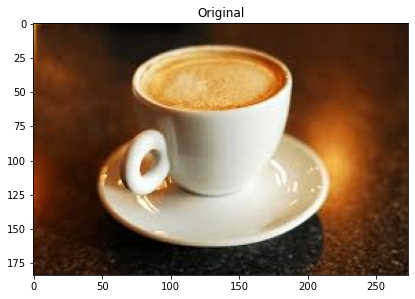

In [3]:
image = cv2.imread("./images/coffee.jpg")
imshow("Original", image)

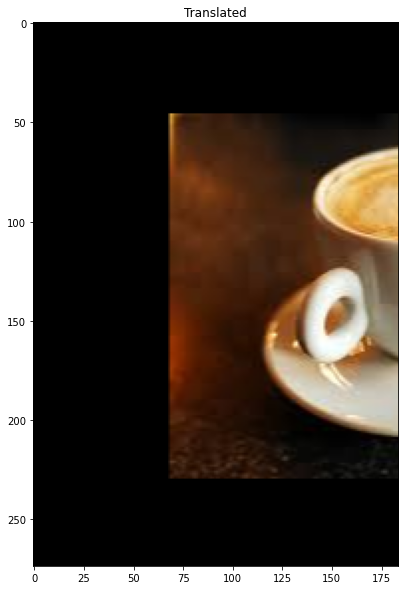

In [4]:
h, w = image.shape[:2]

# Shift it by quaarter of height and width
q_height, q_width = h/4, w/4

# Translation matrix according to the image above
t_mat = np.float32([[1, 0, q_width], [0, 1,q_height]])

image_trans = cv2.warpAffine(image, t_mat, (h,w))
imshow("Translated", image_trans)

In [5]:
print(t_mat)

[[ 1.   0.  68.5]
 [ 0.   1.  46. ]]


### Rotations

### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


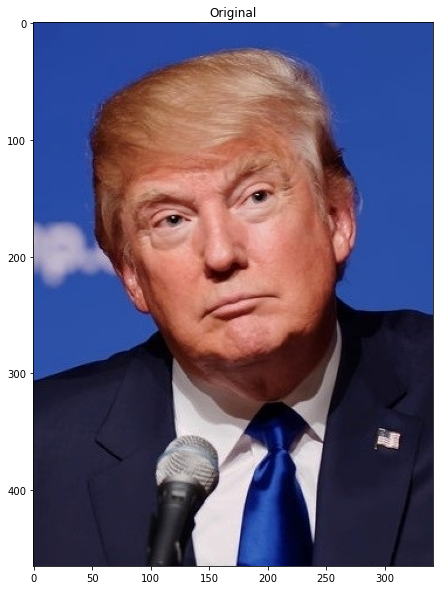

In [28]:
image = cv2.imread("./images/Trump.jpg")
imshow("Original", image)

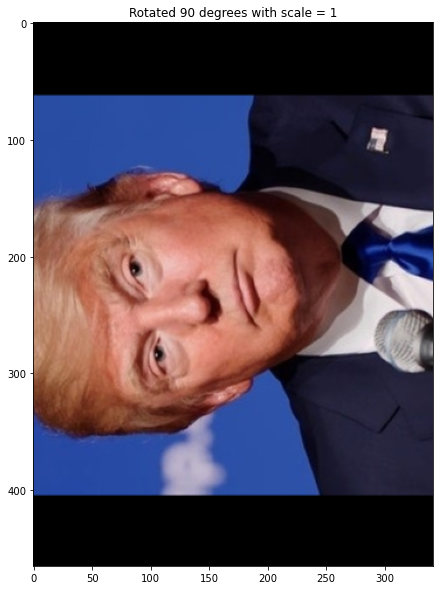

In [29]:
height, width = image.shape[:2]
rot_mat = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

rot_image = cv2.warpAffine(image, rot_mat, (width, height))
imshow("Rotated 90 degrees with scale = 1", rot_image)

[[ 3.061617e-17  5.000000e-01  5.475000e+01]
 [-5.000000e-01  3.061617e-17  3.180000e+02]]


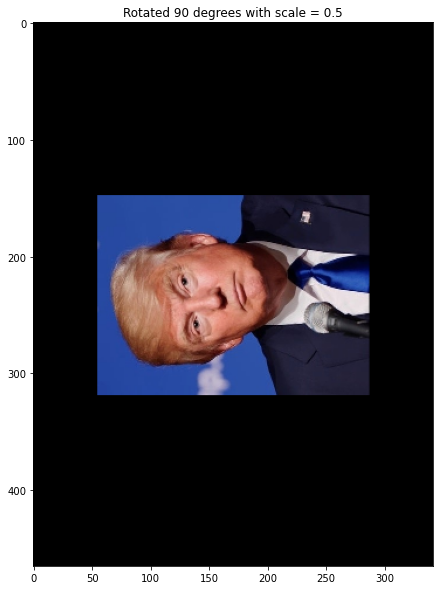

In [32]:
# Divide by two to rototate the image around its centre
rot_mat = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rot_mat)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rot_mat, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)

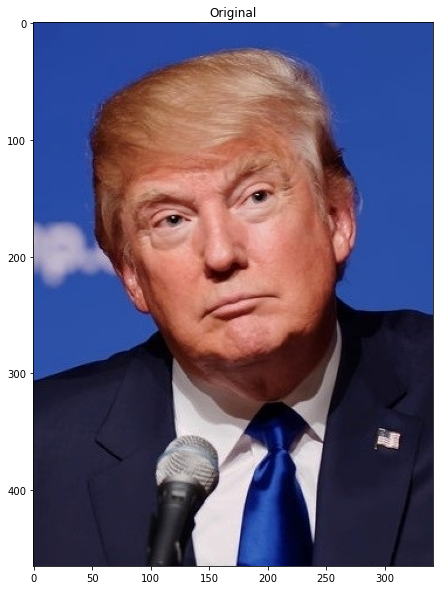

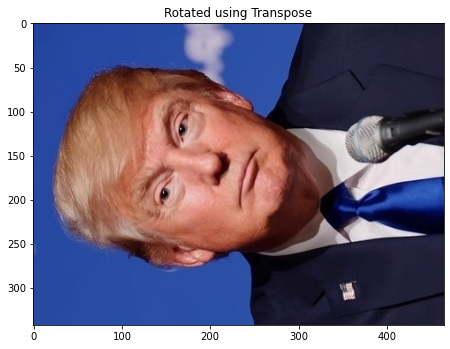

In [33]:
# Get rid of the black space - transpose
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

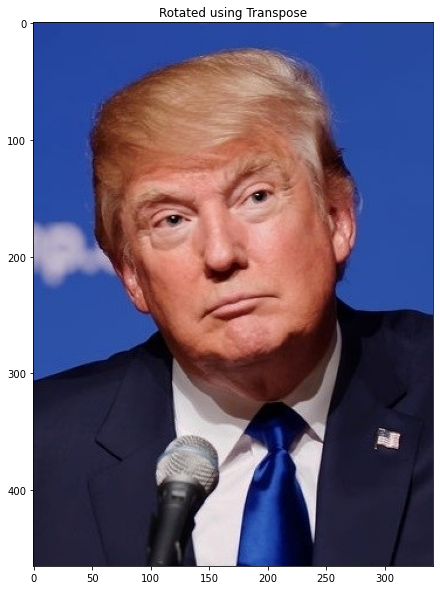

In [35]:
# applied twice to get back to the original
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

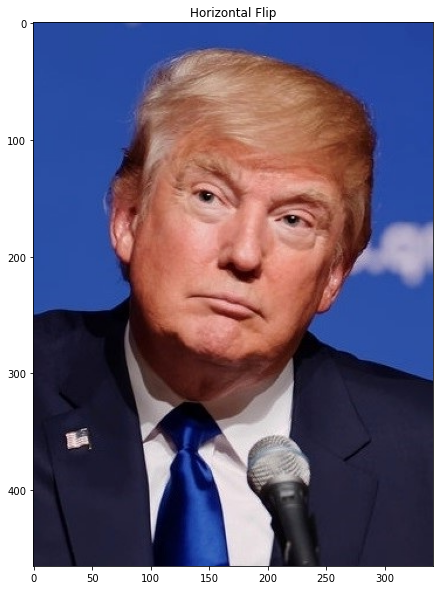

In [36]:
# Horizontal flip.
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)